In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 1000)

sns.set_style('white')

In [2]:
df = pd.read_csv('Assessor_Historical_Secured_Property_Tax_Rolls.csv')
df.head()

C:\Users\bryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,SF Find Neighborhoods 2,Current Police Districts 2,Current Supervisor Districts 2,Analysis Neighborhoods 2,DELETE - Supervisor Districts 2,DELETE - Fire Prevention Districts 2,DELETE - Current Police Districts 2,DELETE - Zip Codes 2,DELETE - Neighborhoods 2,DELETE - Police Districts 2,Neighborhoods
0,2012,0000 0000 0000,9999065,9999,065,45,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,S,0,0.0,2012/01/01,0,0,0,2351,NaN,NaN,NaN,NaN,NaN,NaN,20129999065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,0000 0000 0000,9999189,9999,189,45,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,S,0,0.0,2013/01/01,0,0,0,1505,NaN,NaN,NaN,NaN,NaN,NaN,20139999189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,0000 0000 0000,9999129,9999,129,45,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.0,NaN,511.0,1.0,NaN,NaN,NaN,0,0.0,2008/01/01,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,20079999129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,0000 0000 0000,9999178,9999,178,45,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,S,0,0.0,2014/01/01,0,0,0,27976,NaN,NaN,NaN,NaN,NaN,NaN,20149999178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,0000 0000 0000,9999132,9999,132,45,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.0,NaN,1014.0,1.0,NaN,NaN,S,0,0.0,2008/01/01,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,20089999132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID', 'SF Find 

In [4]:
df.shape

(2666117, 54)

### Analysis of Property type
There is information on many different types of properties including commercial, government, and industrial properties, but the only type of interest for this project will be single family residential

In [5]:
df['Use Definition'].value_counts()

Single Family Residential    1858214
Multi-Family Residential      485611
Commercial Misc               124337
Miscellaneous/Mixed-Use        76801
Commercial Retail              50415
Industrial                     30606
Commercial Office              20526
Commercial Hotel                9666
Government                      9007
Name: Use Definition, dtype: int64

In [6]:
df = df[df['Use Definition'] == 'Single Family Residential']

In [7]:
df.shape

(1858214, 54)

### Analysis of Class Code
We will remove all condominiums because they include information on the individual suites

In [8]:
df['Property Class Code Definition'].value_counts()

Dwelling                      1235981
Condominium                    549931
Live/Work Condominium           40328
Condominium BMR                 18142
Coop Units Segregated            4928
Condominium Economic Unit        3424
Town House                       2547
Town House BMR                   1374
Dwelling BMR                     1282
Live/Work Condominium BMR         251
Office Condo Economic Unit         26
Name: Property Class Code Definition, dtype: int64

In [9]:
df[df['Property Class Code Definition'] == 'Condominium']

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,SF Find Neighborhoods 2,Current Police Districts 2,Current Supervisor Districts 2,Analysis Neighborhoods 2,DELETE - Supervisor Districts 2,DELETE - Fire Prevention Districts 2,DELETE - Current Police Districts 2,DELETE - Zip Codes 2,DELETE - Neighborhoods 2,DELETE - Police Districts 2,Neighborhoods
14,2019,0000 0050 ELGIN PK0000,3502143,3502,143,23,SRES,Single Family Residential,Z,Condominium,1913.0,2.0,3,6.0,2.0,0,NaN,NaN,0.0,0.0,1598,542.0,0.0,NaN,1000.0,1.0,NaN,NaN,NaN,0,0.0,NaN,0,0,0,0,5.0,5M,Mission Dolores,NaN,NaN,NaN,20193502143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2019,0000 0412 LINDEN ST0000,0818083,0818,083,6,SRES,Single Family Residential,Z,Condominium,1909.0,1.0,2,5.0,1.0,0,NaN,NaN,0.0,0.0,851,0.0,0.0,NaN,1000.0,1.0,NaN,NaN,NaN,0,0.0,NaN,0,0,0,0,6.0,6B,Hayes Valley,NaN,NaN,NaN,20190818083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2019,0000 0010 KENNEDY PL0102,4591C611,4591C,611,29,SRES,Single Family Residential,Z,Condominium,2018.0,2.0,2,2.0,1.0,0,NaN,NaN,0.0,0.0,1067,0.0,0.0,NaN,1010.0,1.0,NaN,NaN,NaN,0,0.0,NaN,0,0,0,0,10.0,10J,Hunters Point,NaN,NaN,NaN,20194591C611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,2019,0000 0524 CLIPPER ST0000,6545068,6545,068,39,SRES,Single Family Residential,Z,Condominium,1883.0,1.0,2,4.0,1.0,0,NaN,NaN,0.0,0.0,1126,0.0,0.0,NaN,1000.0,0.5,NaN,NaN,NaN,0,0.0,NaN,0,0,0,0,5.0,5C,Noe Valley,NaN,NaN,NaN,20196545068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2018,0000 0570 INNES AVE 0302,4591C416,4591C,416,29,SRES,Single Family Residential,Z,Condominium,2016.0,2.0,2,6.0,1.0,0,NaN,NaN,0.0,0.0,957,0.0,0.0,NaN,1010.0,1.0,NaN,NaN,NaN,0,0.0,2017/03/10,0,312324,468486,0,10.0,10J,Hunters Point,NaN,NaN,NaN,20184591C416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666098,2019,0000 0420 MISSION BAY NORTH BL0903,8720374,8720,374,44,SRES,Single Family Residential,Z,Condominium,2012.0,1.0,1,3.0,0.0,0,NaN,NaN,0.0,0.0,925,0.0,0.0,NaN,1014.0,1.0,NaN,NaN,NaN,0,0.0,2012/09/24,0,349936,349936,0,9.0,9D,Mission Bay,6.0,Mission Bay,POINT (-122.38858937969 37.771593687893),20198720374,34.0,1.0,10.0,4.0,9.0,14.0,3.0,310.0,20.0,3.0,34.0
2666105,2019,0000 8100 OCEANVIEW TE0117,7126A316,7126A,316,43,SRES,Single Family Residential,Z,Condominium,2002.0,2.0,2,4.0,1.0,0,NaN,D,0.0,0.0,950,0.0,0.0,NaN,1000.0,0.5,11.0,Home Owners,NaN,0,7000.0,2016/12/13,0,332928,332928,0,3.0,3G,Ingleside Heights,7.0,Oceanview/Merced/Ingleside,POINT (-122.46766784421798 37.710481672448),20197126A316,65.0,10.0,8.0,24.0,4.0,9.0,5.0,64.0,24.0,8.0,65.0
2666107,2019,0000 0250 KING ST1306,8702104,8702,104,44,SRES,Single Family Residential,Z,Condominium,2004.0,1.0,1,3.0,0.0,0,NaN,NaN,0.0,0.0,982,0.0,0.0,NaN,1013.0,1.0,NaN,NaN,NaN,0,0.0,2014/07/11,0,342608,513914,0,9.0,9D,Mission Bay,6.0,Mission Bay,POINT (-122.393418132072 37.777642220224),20198702104,34.0,1.0,10.0,4.0,9.0,6.0,2.0,28856.0,20.0,2.0,34.0
2666108,2019,0000 5151 DIAMOND HEIGHTS BL0033,7501137,7501,137,44,SRES,Single Family Residential,Z,Condominium,1979.0,2.0,3,7.0,0.0,1,RM4,D,0.0,0.0,2180,0.0,0.0,NaN,1

In [10]:
prop_classes = ['Dwelling', 'Town House', 'Town House BMR', 'Dwelling BMR']

In [11]:
df = df[df['Property Class Code Definition'].isin(prop_classes)]

In [12]:
df.shape

(1241184, 54)

### Analysis of Number of Rooms
Use number of rooms rather than number of bedrooms because it is inclusive of bedrooms

In [13]:
df['Number of Rooms'].describe().apply(lambda x: format(x,'f'))

count    1241173.000000
mean           6.269224
std            5.370033
min            0.000000
25%            5.000000
50%            6.000000
75%            7.000000
max         1280.000000
Name: Number of Rooms, dtype: object

In [14]:
df[df['Number of Rooms'] == 0]

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,SF Find Neighborhoods 2,Current Police Districts 2,Current Supervisor Districts 2,Analysis Neighborhoods 2,DELETE - Supervisor Districts 2,DELETE - Fire Prevention Districts 2,DELETE - Current Police Districts 2,DELETE - Zip Codes 2,DELETE - Neighborhoods 2,DELETE - Police Districts 2,Neighborhoods
1333,2011,0030 0022 ALTA ST0000,0106034A,0106,034A,1,SRES,Single Family Residential,D,Dwelling,1935.0,5.0,0,0.0,0.0,1,RH3,NaN,20.0,0.0,3250,0.0,7500.00,R,1000.0,1.0,3.0,Welfare,NaN,888885,0.0,2007/06/29,0,266665,622220,0,8.0,8G,Telegraph Hill,3.0,North Beach,POINT (-122.40361539854301 37.801834012626),20110106034A,18.0,6.0,3.0,23.0,10.0,3.0,1.0,308.0,23.0,1.0,18.0
2600,2011,0000 0015 VANDEWATER ST0000,0041018,0041,018,1,SRES,Single Family Residential,D,Dwelling,2006.0,0.0,0,0.0,0.0,0,NBEACH,NaN,0.0,0.0,4045,0.0,1372.00,NaN,1000.0,0.5,NaN,NaN,NaN,0,0.0,2005/03/25,0,768222,701754,0,8.0,8D,North Beach,3.0,North Beach,POINT (-122.41239765054901 37.80516120385),20110041018,106.0,6.0,3.0,23.0,10.0,3.0,1.0,308.0,23.0,1.0,106.0
3939,2011,0000 0844 BAY ST0000,0026014,0026,014,1,SRES,Single Family Residential,D,Dwelling,1900.0,3.0,3,0.0,4.0,1,RH3,D,37.5,0.0,4500,0.0,3953.13,NaN,1000.0,1.0,NaN,NaN,NaN,0,0.0,2011/11/01,0,1387095,3236557,0,8.0,8E,Russian Hill,2.0,Russian Hill,POINT (-122.421258621325 37.804941128281),20110026014,98.0,6.0,6.0,32.0,1.0,5.0,1.0,28858.0,32.0,1.0,98.0
6355,2011,0000 0255 SITUS TO BE ASSIGNEDAV0000,2864999,2864,999,20,SRES,Single Family Residential,D,Dwelling,NaN,0.0,0,0.0,0.0,0,NaN,NaN,0.0,0.0,0,0.0,0.00,NaN,1000.0,1.0,NaN,NaN,NaN,0,0.0,NaN,0,0,0,0,4.0,4C,Forest Hill,NaN,NaN,NaN,20112864999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7450,2011,0000 0040 MONTCLAIR TE0000,0068019C,0068,019C,1,SRES,Single Family Residential,D,Dwelling,NaN,3.0,4,0.0,0.0,0,RH1,NaN,0.0,0.0,2840,648.0,2395.00,NaN,1000.0,1.0,11.0,Home Owners,NaN,0,7000.0,2004/02/06,0,1056930,1585397,0,8.0,8E,Russian Hill,2.0,Russian Hill,POINT (-122.41879138838802 37.802617849565),20110068019C,107.0,6.0,6.0,32.0,1.0,5.0,1.0,28858.0,32.0,1.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665250,2019,0000 0030 SUMMIT WY0030,7331016,7331,016,44,SRES,Single Family Residential,D,Dwelling,NaN,2.0,3,0.0,2.0,0,RM1,NaN,0.0,0.0,1625,0.0,1277.00,O,1000.0,0.5,NaN,NaN,NaN,0,0.0,2017/05/30,0,429040,1001098,0,3.0,3D,Stonestown,7.0,Lakeshore,POINT (-122.47426659331498 37.714738008004005),20197331016,42.0,10.0,8.0,16.0,4.0,1.0,5.0,64.0,14.0,8.0,42.0
2665345,2019,0000 0268 SUMMIT WY0268,7331063,7331,063,44,SRES,Single Family Residential,D,Dwelling,NaN,2.0,3,0.0,2.0,0,RM1,NaN,0.0,0.0,2001,0.0,2200.00,O,1000.0,1.0,NaN,NaN,NaN,0,0.0,2017/03/10,0,498952,1164223,0,3.0,3D,Stonestown,7.0,Lakeshore,POINT (-122.477495395844 37.714991285372),20197331063,42.0,10.0,8.0,16.0,4.0,1.0,5.0,64.0,14.0,8.0,42.0
2665738,2019,0000 0055 SANTA BARBARA AV0000,7172007,7172,007,43,SRES,Single Family Residential,D,Dwelling,1982.0,3.0,3,0.0,2.0,1,RH1,D,0.0,0.0,1750,0.0,2625.00,O,1000.0,1.0,NaN,NaN,NaN,0,0.0,2014/05/23,0,257569,600998,0,10.0,10D,Outer Mission,11.0,Outer Mission,POINT 

In [15]:
df = df[df['Number of Rooms'] < 20]

In [16]:
df.shape

(1240316, 54)

<h3>Analysis of outcome variable Assessed Land Value</h3>
Checking for high and low outliers in land value and the overall distribution of prices

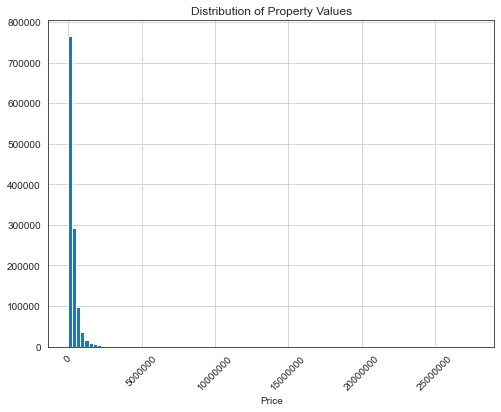

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
df['Assessed Land Value'].hist(bins = 100)
ax.ticklabel_format(style='plain')
plt.xticks(rotation = 45)

plt.title('Distribution of Property Values')
plt.xlabel('Price')
plt.show()

In [18]:
df['Assessed Land Value'].describe().apply(lambda x: format(x,'f'))

count     1240316.000000
mean       314259.212877
std        503991.934099
min             0.000000
25%         48502.000000
50%        191777.500000
75%        406000.000000
max      27674640.000000
Name: Assessed Land Value, dtype: object

In [19]:
# Removing anywhere with 0 land value
df = df[df['Assessed Land Value'] != 0]

In [20]:
# Looking for high outliers
two_std = df['Assessed Land Value'].mean() + (df['Assessed Land Value'].std()*2)
count_above = df[df['Assessed Land Value'] > two_std]['Assessed Land Value'].count()
print('Price of property two standard deviations above mean assessed land value: ',two_std)
print('Number of properties with value two standard deviations above mean: ',count_above)

# Removing these high outliers
df = df[df['Assessed Land Value'] < two_std]

Price of property two standard deviations above mean assessed land value:  1322849.0231114167
Number of properties with value two standard deviations above mean:  31845


In [21]:
df['Assessed Land Value'].describe().apply(lambda x: format(x,'f'))

count    1207264.000000
mean      258293.894106
std       254597.759434
min           57.000000
25%        46542.000000
50%       182795.000000
75%       385450.000000
max      1322814.000000
Name: Assessed Land Value, dtype: object

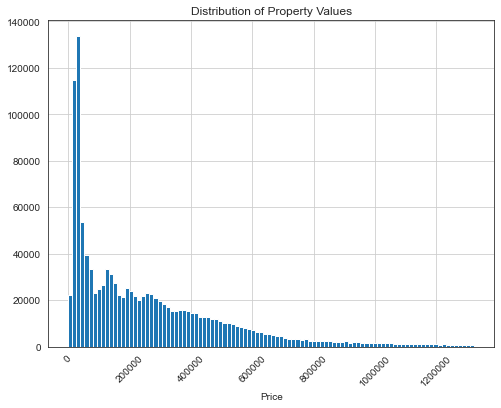

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
df['Assessed Land Value'].hist(bins = 100)
ax.ticklabel_format(style='plain')
plt.xticks(rotation = 45)

plt.title('Distribution of Property Values')
plt.xlabel('Price')
plt.show()

In [23]:
df.shape

(1207264, 54)

### Analysis of Property Sizes

In [32]:
# Square footage
df['Property Area'].describe().apply(lambda x: format(x,'f'))

count    1201825.000000
mean        1571.793833
std          657.427346
min            2.000000
25%         1150.000000
50%         1413.000000
75%         1846.000000
max         9940.000000
Name: Property Area, dtype: object

In [25]:
# Removing properties with extremely large square footage
df = df[df['Property Area'] < 10000]

In [26]:
# There are a lot of properties without any square footage information, which is essentially null data
df[df['Property Area'] == 0]['Property Area'].count()

5264

In [27]:
df = df[df['Property Area'] != 0]

In [33]:
df['Property Area'].describe().apply(lambda x: format(x,'f'))

count    1201825.000000
mean        1571.793833
std          657.427346
min            2.000000
25%         1150.000000
50%         1413.000000
75%         1846.000000
max         9940.000000
Name: Property Area, dtype: object

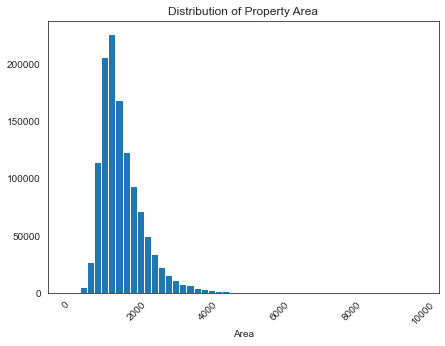

In [35]:
fig,ax = plt.subplots(figsize = (7,5))
plt.hist(x = 'Property Area', data = df, bins = 50)
ax.ticklabel_format(style='plain')
plt.xticks(rotation = 45)

plt.title('Distribution of Property Area')
plt.xlabel('Area')

plt.show()

In [29]:
df.shape

(1201825, 54)

Write data to file for use in R

In [36]:
df.to_csv("/Users/bryan/Documents/Grad School/Spring 2021/Econ 620/housing_data.csv")